## OpenAI Hackathon: Health Data

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import re

ROOT_DIR = Path.cwd()
STEPS_JSON = ROOT_DIR / 'steps.json'
WEIGHT_JSON = ROOT_DIR / 'weight.json'

## Correlation

In [43]:
steps_data = pd.read_json(str(STEPS_JSON))
weight_data = pd.read_json(str(WEIGHT_JSON))

# Change weight data to have a consistent date category
def change_date(create_time_string):
    m = re.search('(\d\d\d\d-\d\d-\d\d)', str(create_time_string))
    return m.group(1)

weight_data['adate'] = weight_data['time'].apply(change_date)
steps_data['adate'] = steps_data['date'].apply(change_date)

# Join weight and steps data
weight_data = weight_data.merge(steps_data, on='adate')

In [47]:
# print(weight_data['adate'])
print(steps_data['adate'])

0      2018-01-01
1      2017-12-31
2      2017-12-30
3      2017-12-29
4      2017-12-28
5      2017-12-27
6      2017-12-26
7      2017-12-25
8      2017-12-24
9      2017-12-23
10     2017-12-22
11     2017-12-21
12     2017-12-20
13     2017-12-19
14     2017-12-18
15     2017-12-17
16     2017-12-16
17     2017-12-15
18     2017-12-14
19     2017-12-13
20     2017-12-12
21     2017-12-11
22     2017-12-10
23     2017-12-09
24     2017-12-08
25     2017-12-07
26     2017-12-06
27     2017-12-05
28     2017-12-04
29     2017-12-03
          ...    
946    2015-05-29
947    2015-05-28
948    2015-05-27
949    2015-05-26
950    2015-05-25
951    2015-05-24
952    2015-05-23
953    2015-05-22
954    2015-05-21
955    2015-05-20
956    2015-05-19
957    2015-05-18
958    2015-05-17
959    2015-05-16
960    2015-05-15
961    2015-05-14
962    2015-05-13
963    2015-05-12
964    2015-05-11
965    2015-05-10
966    2015-05-09
967    2015-05-08
968    2015-05-07
969    2015-05-06
970    201

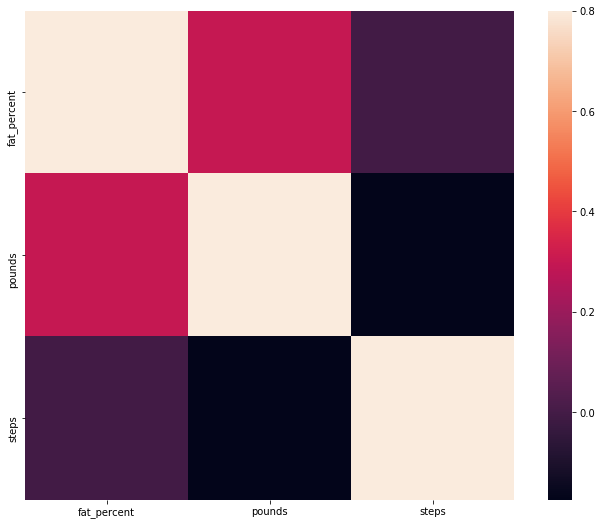

In [55]:
#correlation matrix
corrmat = weight_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
import torch
